In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import json
import gmaps

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [111]:
print("The data consisted of two .csvs: one that had player data and one that had seasons.")
print(f"The player data had {unique_player} players that came from {unique_college} unique colleges. The NBA start years ranged from {minStartyear} to {latestStartyear}. The average age of the players entering the NBA over that time is {averageStartage}, though the average age has come down from {firstYearAverageAge} to {currentYearAverageAge} this year. One tidbit: {singleCollege_sum} of the colleges only sent one player to the NBA! ")

The data consisted of two .csvs: one that had player data and one that had seasons.
The player data had 4500 players that came from 473 unique colleges. The NBA start years ranged from 1947 to 2018. The average age of the players entering the NBA over that time is 23.93, though the average age has come down from 26.59 to 23.44 this year. One tidbit: 171 of the colleges only sent one player to the NBA! 


In [6]:
players = pd.read_csv('player_data.csv')
seasons = pd.read_csv('Seasons_stats.csv')

In [7]:
# File to Load
player_data_to_load = os.path.join("player_data.csv")
seasons_data_to_load = os.path.join("Seasons_stats.csv")

# Read the City and Ride Data
player_data_df = pd.read_csv(player_data_to_load, encoding="UTF-8")
seasons_data_df = pd.read_csv(seasons_data_to_load, encoding="UTF-8")

# Combine the data into a single dataset
#pyber_data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])

#pyber_data_complete.to_csv("testData.csv", index=False, header=True)

# Display the data table for preview
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [8]:
#Number of unique colleges
unique_college = player_data_df['college'].nunique()
unique_college

473

In [93]:
minStartyear = player_data_df['year_start'].min()
minStartyear

1947

In [94]:
latestStartyear = player_data_df['year_start'].max()
latestStartyear

2018

In [9]:
#Number of unique players
unique_player = player_data_df['name'].nunique()
unique_player

4500

In [78]:
playerYears_df = player_data_df[['year_start','birth_date']].copy()
playerYears_df.head()

,year_start,birth_date
0,1991,"June 24, 1968"
1,1969,"April 7, 1946"
2,1970,"April 16, 1947"
3,1991,"March 9, 1969"
4,1998,"November 3, 1974"


In [79]:
#Birth year
playerYears_df['birth_date'] = pd.to_datetime(playerYears_df['birth_date']).dt.year
playerYears_df.head()

,year_start,birth_date
0,1991,1968.0
1,1969,1946.0
2,1970,1947.0
3,1991,1969.0
4,1998,1974.0


In [81]:
playerYears_df['entryAge'] = playerYears_df['year_start'] - playerYears_df['birth_date']
playerYears_df.head()

,year_start,birth_date,entryAge
0,1991,1968.0,23.0
1,1969,1946.0,23.0
2,1970,1947.0,23.0
3,1991,1969.0,22.0
4,1998,1974.0,24.0


In [101]:
averageStartage = playerYears_df['entryAge'].mean()
averageStartage = np.round(averageStartage, decimals=2)
averageStartage

23.93

In [110]:
#ageYeargroup = playerYears_df.groupby('year_start')
ageYeargroup = playerYears_df.groupby(['year_start'], as_index=False).agg({'entryAge':'mean'}).rename(columns={'entryAge':'AverAge'})
ageYeargroup.head()

,year_start,AverAge
0,1947,26.594937
1,1948,26.075000
2,1949,26.329787
3,1950,26.025000
4,1951,24.666667


In [106]:
firstYearAverageAge = ageYeargroup.iloc[0]['AverAge']
firstYearAverageAge = np.round(firstYearAverageAge, decimals=2)
firstYearAverageAge

26.59

In [108]:
currentYearAverageAge = ageYeargroup.iloc[-1]['AverAge']
currentYearAverageAge = np.round(currentYearAverageAge, decimals=2)
currentYearAverageAge

23.44

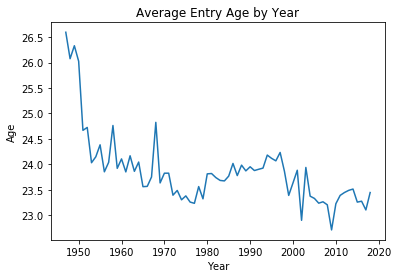

In [91]:
year_strt = ageYeargroup['year_start']
AverAge = ageYeargroup['AverAge']
plt.title("Average Entry Age by Year")
plt.xlabel("Year")
plt.ylabel("Age")

plt.plot(year_strt, AverAge)
plt.show()

In [10]:
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})
countByCollege.head()

,college,count
0,Acadia University,1
1,Alabama - Huntsville,1
2,Alabama A&M University,1
3,Alabama State University,2
4,Albany State University,5


In [21]:
#singleCollege = countByCollege.groupby('count').size()
singleCollege = countByCollege.loc[countByCollege['count'] == 1]
singleCollege_sum = singleCollege['college'].count()
singleCollege_sum

171

In [22]:
top25colleges = countByCollege.sort_values(by = 'count', ascending=False).head(25)
top25colleges = top25colleges.reset_index(drop=True)
top25colleges.head()

,college,count
0,University of Kentucky,99
1,"University of California, Los Angeles",91
2,University of North Carolina,87
3,University of Kansas,72
4,Duke University,71


<BarContainer object of 25 artists>

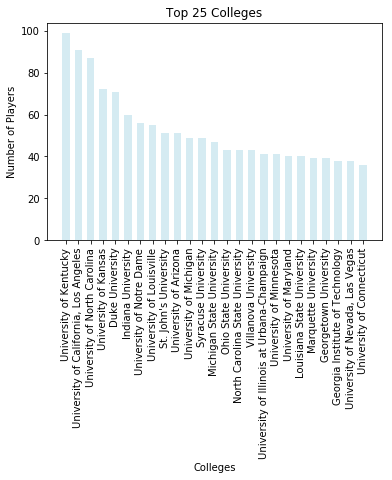

In [56]:
bar25colleges = top25colleges['college']
bar25count = top25colleges['count']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Number of Players")
plt.xticks(rotation=90)
top25colleges['college']

plt.xticks(width, bar25colleges)
plt.bar(width, bar25count, color='lightblue', alpha=0.5, align="center", width=3)

In [57]:
plt.savefig("top25colleges.png")

<Figure size 432x288 with 0 Axes>

In [58]:
top25colleges["Lat"] = ""
top25colleges["Lng"] = ""
top25colleges

,college,count,Lat,Lng
0,University of Kentucky,99,,
1,"University of California, Los Angeles",91,,
2,University of North Carolina,87,,
3,University of Kansas,72,,
4,Duke University,71,,
5,Indiana University,60,,
6,University of Notre Dame,56,,
7,University of Louisville,55,,
8,St. John's University,51,,
9,University of Arizona,51,,


In [59]:
# create a params dict that will be updated with new city each iteration
params2 = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in top25colleges.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['college']

    # update address key value
    params2['address'] = city

    # make request
    cities_lat_lng = requests.get(base_url, params=params2)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    top25colleges.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    top25colleges.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
top25colleges

,college,count,Lat,Lng
0,University of Kentucky,99,38.0307,-84.504
1,"University of California, Los Angeles",91,34.0689,-118.445
2,University of North Carolina,87,35.9049,-79.0469
3,University of Kansas,72,38.9543,-95.2558
4,Duke University,71,36.0014,-78.9382
5,Indiana University,60,39.1784,-86.5133
6,University of Notre Dame,56,41.7056,-86.2353
7,University of Louisville,55,38.2123,-85.7585
8,St. John's University,51,40.7221,-73.7942
9,University of Arizona,51,32.2319,-110.95


In [61]:
top25colleges.to_csv("output-latlong-25.csv")

In [62]:
# Store latitude and longitude in locations
locations = top25colleges[["Lat", "Lng"]]

# Fill NaN values and convert to float
count = top25colleges["count"].astype(float)

In [63]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))